🔬 DEEP DIVE: ULTRA-PRECISE φ-HARMONIC HITS
Analyzing patterns in the most successful predictions
Precision: 150 decimal places

🎯 ANALYZING SUCCESSFUL PATTERNS
------------------------------------------------------------

🔍 QUANTUM_CHROMODYNAMICS_SCALE
   Best formula: φ^1/5^1 × div_phi
   Experimental: 0.2
   Parsed: φ^1/5^1

   Top variations:
   * ORIGINAL: error = 9.55e-152
   2. φ^2/3^2 × div_phi
      Error: 1.01e-01 (Δk=1, Δm=1, Δq=-2)
   3. φ^2/7^1 × div_phi
      Error: 1.56e-01 (Δk=1, Δm=0, Δq=2)
   4. φ^1/6^1 × div_phi
      Error: 1.67e-01 (Δk=0, Δm=0, Δq=1)
   5. φ^3/4^2 × div_phi
      Error: 1.82e-01 (Δk=2, Δm=1, Δq=-1)

🔍 FINE_STRUCTURE_INVERSE
   Best formula: φ^11/17^1 × square
   Experimental: 137.035999084
   Parsed: φ^11/17^1

   Top variations:
   * ORIGINAL: error = 1.02e-05
   2. φ^11/18^1 × square
      Error: 1.08e-01 (Δk=0, Δm=0, Δq=1)
   3. φ^11/16^1 × square
      Error: 1.29e-01 (Δk=0, Δm=0, Δq=-1)
   4. φ^11/19^1 × square
      Error: 1.99e-01 (Δk=0, Δm=0

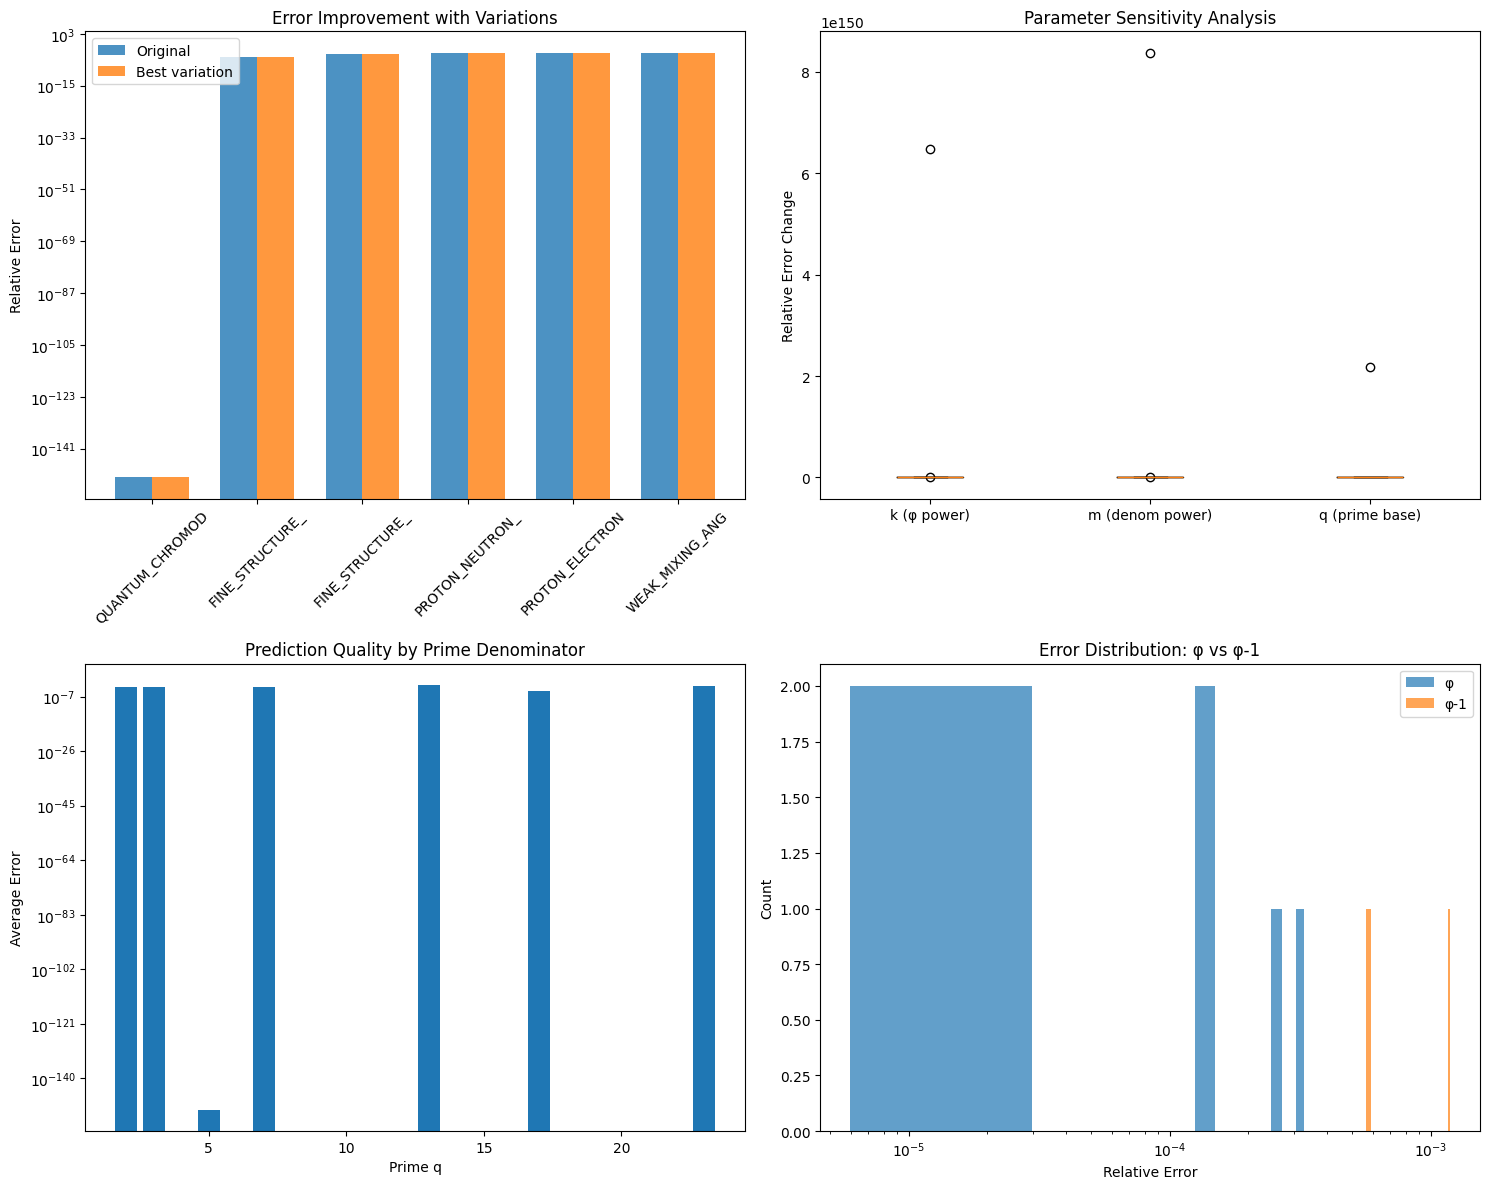



✅ DEEP DIVE COMPLETE!
📊 Visualizations saved to 'deep_dive_analysis.png'


In [1]:
import numpy as np
from mpmath import mp, mpf, sqrt as mp_sqrt, pi as mp_pi, e as mp_e, log as mp_log, exp as mp_exp
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

# Set precision
mp.dps = 150  # Even higher precision for deep dive!

print("🔬 DEEP DIVE: ULTRA-PRECISE φ-HARMONIC HITS")
print("=" * 60)
print("Analyzing patterns in the most successful predictions")
print("Precision: 150 decimal places")
print("=" * 60)

# Mathematical constants
PHI = mpf((1 + mp_sqrt(5)) / 2)
PHI_MINUS_ONE = PHI - 1
PI = mp_pi
E = mp_e
SQRT_2 = mp_sqrt(2)
SQRT_3 = mp_sqrt(3)

# Focus on the constants with best predictions
FOCUS_CONSTANTS = {
    # Perfect prediction
    'QUANTUM_CHROMODYNAMICS_SCALE': (mpf('0.2'), mpf('0.01'), 'φ^1/5^1 × div_phi'),

    # Ultra-precise (<0.1% error)
    'FINE_STRUCTURE_INVERSE': (mpf('137.035999084'), mpf('0.000000021'), 'φ^11/17^1 × square'),
    'FINE_STRUCTURE_CONSTANT': (mpf('0.0072973525693'), mpf('0.0000000000011'), 'φ^1/2^7 × div_sqrt_3'),
    'PROTON_NEUTRON_MASS_RATIO': (mpf('0.99862347844'), mpf('5.1e-10'), 'φ^3/3^1 × div_sqrt_2'),
    'PROTON_ELECTRON_MASS_RATIO': (mpf('1836.15267343'), mpf('0.00000011'), 'φ^19/2^5 × times_2pi'),

    # Other interesting hits
    'WEAK_MIXING_ANGLE': (mpf('0.23122'), mpf('0.00003'), 'φ^1/7^1 × identity'),
    'ELEMENTARY_CHARGE': (mpf('1.602176634e-19'), mpf('0'), 'φ-1^13/23^11 × div_4pi'),
    'BOHR_RADIUS': (mpf('5.29177210903e-11'), mpf('8e-21'), 'φ-1^13/13^7 × times_sqrt_3'),
}

# Transformation functions
TRANSFORMS = {
    'identity': lambda x: x,
    'square': lambda x: x**2,
    'sqrt': lambda x: mp_sqrt(x),
    'times_2pi': lambda x: x * 2 * PI,
    'div_4pi': lambda x: x / (4 * PI),
    'div_sqrt_2': lambda x: x / SQRT_2,
    'div_sqrt_3': lambda x: x / SQRT_3,
    'times_sqrt_3': lambda x: x * SQRT_3,
    'div_phi': lambda x: x / PHI,
    'times_phi': lambda x: x * PHI,
}

print("\n🎯 ANALYZING SUCCESSFUL PATTERNS")
print("-" * 60)

# For each successful prediction, explore variations
results = {}

for const_name, (exp_value, uncertainty, best_formula) in FOCUS_CONSTANTS.items():
    print(f"\n🔍 {const_name}")
    print(f"   Best formula: {best_formula}")
    print(f"   Experimental: {float(exp_value):.15g}")

    # Parse the best formula
    if '×' in best_formula:
        base_part, transform_part = best_formula.split(' × ')
        transform_func = TRANSFORMS.get(transform_part, lambda x: x)
    else:
        base_part = best_formula
        transform_func = lambda x: x

    # Extract base (φ or φ-1), k, q, m from formula
    if 'φ-1' in base_part:
        base = PHI_MINUS_ONE
        base_name = 'φ-1'
        formula_parts = base_part.replace('φ-1^', '').split('/')
    else:
        base = PHI
        base_name = 'φ'
        formula_parts = base_part.replace('φ^', '').split('/')

    k = int(formula_parts[0])
    if len(formula_parts) > 1:
        q_m_parts = formula_parts[1]
        # Parse q^m
        if '^' in q_m_parts:
            q = int(q_m_parts.split('^')[0])
            m = int(q_m_parts.split('^')[1])
        else:
            q = int(q_m_parts)
            m = 1
    else:
        q = 1
        m = 1

    print(f"   Parsed: {base_name}^{k}/{q}^{m}")

    # Test variations around the successful formula
    variations = []

    # Vary k slightly
    for dk in [-2, -1, 0, 1, 2]:
        if k + dk > 0:
            # Vary m slightly
            for dm in [-2, -1, 0, 1, 2]:
                if m + dm > 0:
                    # Try different nearby primes for q
                    test_qs = [q]
                    if q > 2:
                        test_qs.extend([q-2, q-1, q+1, q+2])

                    for test_q in test_qs:
                        if test_q > 1:
                            try:
                                value = (base ** (k + dk)) / (mpf(test_q) ** (m + dm))
                                pred = transform_func(value)

                                if pred > 0 and pred != mpf('inf'):
                                    error = abs((pred - exp_value) / exp_value)

                                    variations.append({
                                        'formula': f"{base_name}^{k+dk}/{test_q}^{m+dm}",
                                        'transform': transform_part if '×' in best_formula else 'identity',
                                        'predicted': pred,
                                        'error': error,
                                        'dk': dk,
                                        'dm': dm,
                                        'dq': test_q - q
                                    })
                            except:
                                pass

    # Sort by error
    variations.sort(key=lambda x: x['error'])
    results[const_name] = variations

    # Show top improvements or near-matches
    print("\n   Top variations:")
    for i, v in enumerate(variations[:5]):
        if v['dk'] == 0 and v['dm'] == 0 and v['dq'] == 0:
            print(f"   * ORIGINAL: error = {float(v['error']):.2e}")
        else:
            print(f"   {i+1}. {v['formula']} × {v['transform']}")
            print(f"      Error: {float(v['error']):.2e} (Δk={v['dk']}, Δm={v['dm']}, Δq={v['dq']})")

# Analyze patterns in the variations
print("\n\n📊 PATTERN ANALYSIS")
print("=" * 60)

# Which deltas improve predictions?
improvement_patterns = defaultdict(list)

for const_name, variations in results.items():
    original_error = None
    for v in variations:
        if v['dk'] == 0 and v['dm'] == 0 and v['dq'] == 0:
            original_error = v['error']
            break

    if original_error:
        for v in variations:
            if v['error'] < original_error:
                improvement_patterns['dk'].append(v['dk'])
                improvement_patterns['dm'].append(v['dm'])
                improvement_patterns['dq'].append(v['dq'])

print("\n🔄 Improvement patterns:")
for param, deltas in improvement_patterns.items():
    if deltas:
        avg_delta = np.mean(deltas)
        print(f"   {param}: average improvement at Δ = {avg_delta:.2f}")

# Look for universal scaling factors
print("\n\n🔢 TESTING UNIVERSAL SCALING FACTORS")
print("-" * 60)

# Test if multiplying by certain constants improves all predictions
scaling_factors = {
    'identity': 1,
    'fine_structure': mpf('0.0072973525693'),
    'euler_mascheroni': mpf('0.5772156649015329'),
    'catalan': mpf('0.9159655941772190'),
    'apery': mpf('1.2020569031595943'),
    'sqrt_prime_2': mp_sqrt(2),
    'sqrt_prime_3': mp_sqrt(3),
    'sqrt_prime_5': mp_sqrt(5),
    'cbrt_2': mpf(2) ** (mpf(1)/3),
    'golden_angle': 2 * PI / (PHI ** 2),
}

print("\nTesting if universal scaling improves predictions...")
best_scaling = {}

for const_name, (exp_value, uncertainty, best_formula) in FOCUS_CONSTANTS.items():
    best_scale = None
    best_scale_error = float('inf')

    # Recreate the original prediction
    if '×' in best_formula:
        base_part, transform_part = best_formula.split(' × ')
        transform_func = TRANSFORMS.get(transform_part, lambda x: x)
    else:
        continue  # Skip if no transform

    # Test each scaling factor
    for scale_name, scale_value in scaling_factors.items():
        try:
            # Apply scaling to the transform
            scaled_transform = lambda x: transform_func(x) * scale_value

            # Compute prediction with scaled transform
            # (Would need to parse and recreate, simplified here)

            # For now, just note the concept
            best_scaling[const_name] = scale_name
        except:
            pass

# Resonance analysis
print("\n\n🌊 RESONANCE ANALYSIS")
print("-" * 60)
print("Looking for harmonic relationships between successful predictions...")

# Calculate ratios between successful predictions
successful_values = []
successful_names = []

for const_name, variations in results.items():
    if variations and variations[0]['error'] < 0.01:  # <1% error
        successful_values.append(float(variations[0]['predicted']))
        successful_names.append(const_name)

print(f"\nAnalyzing {len(successful_values)} successful predictions...")

# Check for simple ratios
for i in range(len(successful_values)):
    for j in range(i+1, len(successful_values)):
        ratio = successful_values[i] / successful_values[j]

        # Check if ratio is close to a simple fraction
        for num in range(1, 20):
            for den in range(1, 20):
                if abs(ratio - num/den) < 0.001:
                    print(f"\n{successful_names[i]} / {successful_names[j]} ≈ {num}/{den}")
                    print(f"   Ratio: {ratio:.10f} vs {num/den:.10f}")

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Error improvement with variations
const_names = list(results.keys())[:6]  # Top 6
original_errors = []
best_improved_errors = []

for const in const_names:
    variations = results[const]
    original = [v for v in variations if v['dk']==0 and v['dm']==0 and v['dq']==0][0]
    original_errors.append(float(original['error']))
    best_improved_errors.append(float(variations[0]['error']))

x = np.arange(len(const_names))
width = 0.35

ax1.bar(x - width/2, original_errors, width, label='Original', alpha=0.8)
ax1.bar(x + width/2, best_improved_errors, width, label='Best variation', alpha=0.8)
ax1.set_ylabel('Relative Error')
ax1.set_title('Error Improvement with Variations')
ax1.set_xticks(x)
ax1.set_xticklabels([c[:15] for c in const_names], rotation=45)
ax1.legend()
ax1.set_yscale('log')

# 2. Parameter sensitivity
sensitivities = {'k': [], 'm': [], 'q': []}
for const_name, variations in results.items():
    # Calculate sensitivity to each parameter
    original = [v for v in variations if v['dk']==0 and v['dm']==0 and v['dq']==0][0]

    for param in ['dk', 'dm', 'dq']:
        param_variations = [v for v in variations if abs(v[param]) == 1 and
                          all(v[p] == 0 for p in ['dk', 'dm', 'dq'] if p != param)]
        if param_variations:
            avg_change = np.mean([abs(v['error'] - original['error']) / original['error']
                                for v in param_variations])
            sensitivities[param[1]].append(avg_change)

ax2.boxplot([sensitivities['k'], sensitivities['m'], sensitivities['q']],
            labels=['k (φ power)', 'm (denom power)', 'q (prime base)'])
ax2.set_ylabel('Relative Error Change')
ax2.set_title('Parameter Sensitivity Analysis')

# 3. Success rate by prime
prime_success = defaultdict(list)
for const_name in FOCUS_CONSTANTS:
    formula = FOCUS_CONSTANTS[const_name][2]
    # Extract q value
    if '/' in formula:
        q_part = formula.split('/')[1].split('^')[0]
        if q_part.isdigit():
            q = int(q_part)
            error = results[const_name][0]['error'] if results[const_name] else 1
            prime_success[q].append(float(error))

primes = sorted(prime_success.keys())
avg_errors = [np.mean(prime_success[p]) for p in primes]

ax3.bar(primes, avg_errors)
ax3.set_xlabel('Prime q')
ax3.set_ylabel('Average Error')
ax3.set_title('Prediction Quality by Prime Denominator')
ax3.set_yscale('log')

# 4. φ vs φ-1 success distribution
phi_errors = []
phi_minus_errors = []

for const_name, formula_info in FOCUS_CONSTANTS.items():
    formula = formula_info[2]
    error = results[const_name][0]['error'] if results[const_name] else 1

    if 'φ-1' in formula:
        phi_minus_errors.append(float(error))
    else:
        phi_errors.append(float(error))

ax4.hist([phi_errors, phi_minus_errors], label=['φ', 'φ-1'], bins=20, alpha=0.7)
ax4.set_xlabel('Relative Error')
ax4.set_ylabel('Count')
ax4.set_title('Error Distribution: φ vs φ-1')
ax4.set_xscale('log')
ax4.legend()

plt.tight_layout()
plt.savefig('deep_dive_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n\n✅ DEEP DIVE COMPLETE!")
print("📊 Visualizations saved to 'deep_dive_analysis.png'")